In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Step 0: Load dataset
data = pd.read_csv('heart.csv')

# Features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Step 1: Train and visualize Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize Decision Tree
dot_data = export_graphviz(
    dt, out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True, rounded=True, special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", view=True)

'decision_tree.png'

In [16]:
# Step 2: Overfitting Analysis
print("Default Decision Tree:")
print(f"Train Accuracy: {accuracy_score(y_train, dt.predict(X_train)):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, dt.predict(X_test)):.3f}")

# Pruned Decision Tree
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

print("\nPruned Decision Tree (max_depth=3):")
print(f"Train Accuracy: {accuracy_score(y_train, dt_pruned.predict(X_train)):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, dt_pruned.predict(X_test)):.3f}")


Default Decision Tree:
Train Accuracy: 1.000
Test Accuracy: 0.985

Pruned Decision Tree (max_depth=3):
Train Accuracy: 0.851
Test Accuracy: 0.780


In [17]:
# Step 3: Train Random Forest and compare
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("\nRandom Forest:")
print(f"Train Accuracy: {accuracy_score(y_train, rf.predict(X_train)):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, rf.predict(X_test)):.3f}")


Random Forest:
Train Accuracy: 1.000
Test Accuracy: 0.985


<ipython-input-18-615620f1a046>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_sorted, y=importances_sorted.index, palette="viridis")


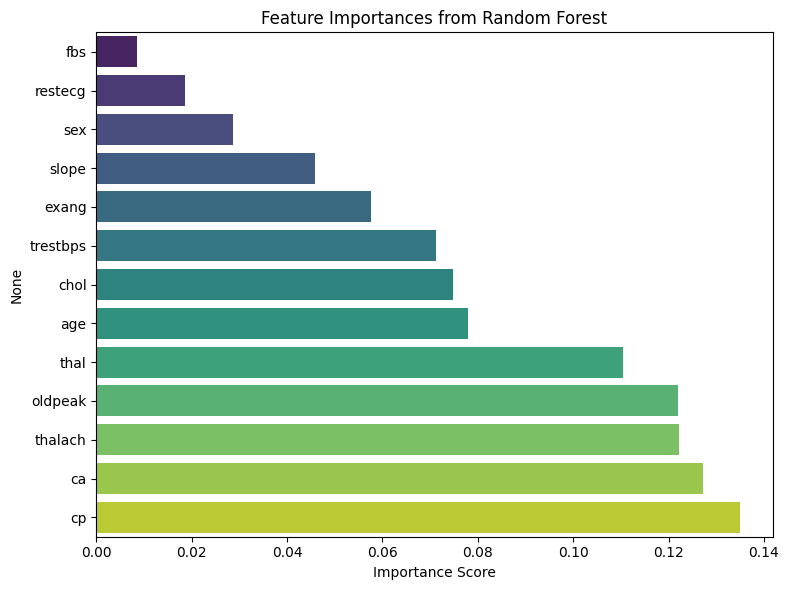

In [18]:
# Step 4: Feature Importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=importances_sorted, y=importances_sorted.index, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [19]:
# Step 5: Cross-validation
dt_cv = cross_val_score(dt_pruned, X, y, cv=5)
print("\nPruned Decision Tree CV Accuracy:")
print(f"Mean: {dt_cv.mean():.3f}, Std: {dt_cv.std() * 2:.3f}")

rf_cv = cross_val_score(rf, X, y, cv=5)
print("\nRandom Forest CV Accuracy:")
print(f"Mean: {rf_cv.mean():.3f}, Std: {rf_cv.std() * 2:.3f}")


Pruned Decision Tree CV Accuracy:
Mean: 0.830, Std: 0.042

Random Forest CV Accuracy:
Mean: 0.997, Std: 0.012
